In [81]:
# Import the data processing and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [82]:
# Read the dataset in pandas
df_liver = pd.read_csv('liver_disease_dataset.csv')

In [83]:
# Access the first 5 rows of df_liver
df_liver.head()

,Age,Sex,ALT (SGPT),AST (SGOT),AST:ALT Ratio,GGTP,ALP,Bilirubin Total,Bilirubin Direct,Bilirubin Indirect,Total Protein,Albumin,A:G Ratio,Condition
0,68,Male,64,54,0.843750,72,265,1.969954,0.727949,1.242005,8.184780,5.697040,2.290038,1
1,58,Female,164,168,1.024390,152,165,4.149038,1.547862,2.601176,8.139380,4.526538,1.252899,4
2,44,Female,123,116,0.943089,117,167,0.750356,0.255556,0.494800,7.748071,3.975155,1.053600,3
3,72,Male,104,113,1.086538,118,63,4.210851,1.210505,3.000346,7.788219,4.697870,1.520170,2
4,37,Male,153,152,0.993464,137,188,3.269794,1.368103,1.901690,8.193053,4.791327,1.408494,3


In [84]:
# Access the last 5 rows of df_liver
df_liver.tail()

,Age,Sex,ALT (SGPT),AST (SGOT),AST:ALT Ratio,GGTP,ALP,Bilirubin Total,Bilirubin Direct,Bilirubin Indirect,Total Protein,Albumin,A:G Ratio,Condition
4995,61,Male,125,122,0.976000,108,83,0.557849,0.239602,0.318247,7.436343,3.919560,1.114527,3
4996,75,Male,186,186,1.000000,202,86,2.517879,1.487187,1.030692,6.690305,4.415116,1.940540,4
4997,76,Female,20,10,0.500000,21,91,2.523455,1.621034,0.902421,8.144086,4.824434,1.453290,0
4998,77,Female,58,57,0.982758,58,242,1.688122,0.668541,1.019581,7.452506,4.807273,1.817328,1
4999,52,Female,40,30,0.750000,25,237,4.666130,2.347521,2.318609,7.238159,3.642945,1.013273,1


In [85]:
# Retrieve the colunmn information
df_liver.columns.values

array(['Age', 'Sex', 'ALT (SGPT)', 'AST (SGOT)', 'AST:ALT Ratio', 'GGTP',
       'ALP', 'Bilirubin Total', 'Bilirubin Direct', 'Bilirubin Indirect',
       'Total Protein', 'Albumin', 'A:G Ratio', 'Condition'], dtype=object)

In [86]:
# Retrieve the full information of df_liver regarding the features and response, in order to verify 
# if the values are unique or are there any missing data.
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Sex                 5000 non-null   object 
 2   ALT (SGPT)          5000 non-null   int64  
 3   AST (SGOT)          5000 non-null   int64  
 4   AST:ALT Ratio       5000 non-null   float64
 5   GGTP                5000 non-null   int64  
 6   ALP                 5000 non-null   int64  
 7   Bilirubin Total     5000 non-null   float64
 8   Bilirubin Direct    5000 non-null   float64
 9   Bilirubin Indirect  5000 non-null   float64
 10  Total Protein       5000 non-null   float64
 11  Albumin             5000 non-null   float64
 12  A:G Ratio           5000 non-null   float64
 13  Condition           5000 non-null   int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 547.0+ KB


In [87]:
# Find the shape of the datframe df_liver
df_liver.shape

(5000, 14)

In [88]:
# We can performing some simple statistical inferences to get a good feel of the data
df_liver.describe()

,Age,ALT (SGPT),AST (SGOT),AST:ALT Ratio,GGTP,ALP,Bilirubin Total,Bilirubin Direct,Bilirubin Indirect,Total Protein,Albumin,A:G Ratio,Condition
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,54.666600,110.338600,110.020200,0.995582,109.213800,173.488200,2.596779,1.306645,1.290134,7.009243,4.198297,1.547820,2.373000
std,14.384312,51.639245,52.027246,0.088140,53.425527,71.864288,1.390809,0.868958,0.858292,0.861822,0.657532,0.378893,1.281483
min,30.000000,20.000000,10.000000,0.500000,-5.000000,50.000000,0.200045,0.041407,0.043448,5.500437,2.771719,1.000079,0.000000
25%,42.000000,65.000000,65.000000,0.951923,64.000000,111.000000,1.389119,0.601172,0.606865,6.273982,3.703848,1.217949,1.000000
50%,55.000000,111.000000,111.000000,1.000000,110.000000,172.000000,2.577419,1.148267,1.116793,7.024370,4.165442,1.492611,2.000000
75%,67.000000,155.000000,155.000000,1.041666,154.000000,236.000000,3.812826,1.873529,1.841793,7.753529,4.648466,1.849437,4.000000
max,79.000000,199.000000,207.000000,1.449999,222.000000,299.000000,4.998535,3.978766,3.898681,8.499922,5.908445,2.333098,4.000000


In [89]:
# I can quickly perform some additional statistics to include all
df_liver.describe(include ='all')

,Age,Sex,ALT (SGPT),AST (SGOT),AST:ALT Ratio,GGTP,ALP,Bilirubin Total,Bilirubin Direct,Bilirubin Indirect,Total Protein,Albumin,A:G Ratio,Condition
count,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,54.666600,NaN,110.338600,110.020200,0.995582,109.213800,173.488200,2.596779,1.306645,1.290134,7.009243,4.198297,1.547820,2.373000
std,14.384312,NaN,51.639245,52.027246,0.088140,53.425527,71.864288,1.390809,0.868958,0.858292,0.861822,0.657532,0.378893,1.281483
min,30.000000,NaN,20.000000,10.000000,0.500000,-5.000000,50.000000,0.200045,0.041407,0.043448,5.500437,2.771719,1.000079,0.000000
25%,42.000000,NaN,65.000000,65.000000,0.951923,64.000000,111.000000,1.389119,0.601172,0.606865,6.273982,3.703848,1.217949,1.000000
50%,55.000000,NaN,111.000000,111.000000,1.000000,110.000000,172.000000,2.577419,1.148267,1.116793,7.024370,4.165442,1.492611,2.000000
75%,67.000000,NaN,155.000000,155.000000,1.041666,154.000000,236.000000,3.812826,1.873529,1.841793,7.753529,4.648466,1.849437,4.000000


In [90]:
# Define a function that allows us to create a table of missing values in df_liver and their percentages in 
# descending order
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percentage_final = (round(percentage, 2) * 100)
    total_percent = pd.concat(objs=[total, percentage_final], axis = 1, keys=['Total', '%'])
    return total_percent

In [91]:
# Find the total count and % of missing values 
missing_values(df_liver)

,Total,%
Age,0,0.0
Sex,0,0.0
ALT (SGPT),0,0.0
AST (SGOT),0,0.0
AST:ALT Ratio,0,0.0
GGTP,0,0.0
ALP,0,0.0
Bilirubin Total,0,0.0
Bilirubin Direct,0,0.0
Bilirubin Indirect,0,0.0


In [92]:
# Change the current categorical feature Gender to a numerical feature of 0 or 1 (as ML algorithms prefer numerical 
# features)
df_liver['Sex'] = df_liver['Sex'].map({'Male': 1, 'Female': 0})
# Check to make sure that the gender has been correctly converted
df_liver.head()

,Age,Sex,ALT (SGPT),AST (SGOT),AST:ALT Ratio,GGTP,ALP,Bilirubin Total,Bilirubin Direct,Bilirubin Indirect,Total Protein,Albumin,A:G Ratio,Condition
0,68,1,64,54,0.843750,72,265,1.969954,0.727949,1.242005,8.184780,5.697040,2.290038,1
1,58,0,164,168,1.024390,152,165,4.149038,1.547862,2.601176,8.139380,4.526538,1.252899,4
2,44,0,123,116,0.943089,117,167,0.750356,0.255556,0.494800,7.748071,3.975155,1.053600,3
3,72,1,104,113,1.086538,118,63,4.210851,1.210505,3.000346,7.788219,4.697870,1.520170,2
4,37,1,153,152,0.993464,137,188,3.269794,1.368103,1.901690,8.193053,4.791327,1.408494,3


<Axes: xlabel='Condition', ylabel='count'>

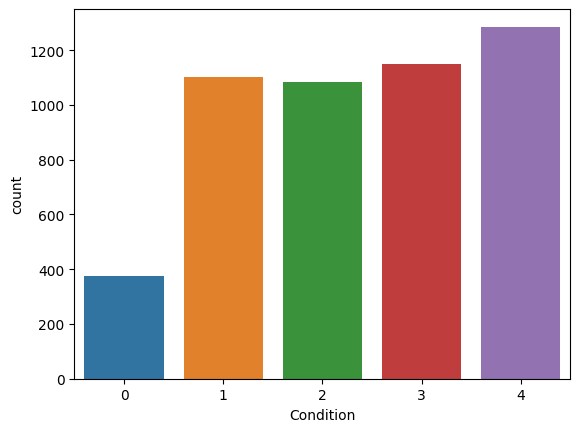

In [95]:
#plot the count of the target variable
sns.countplot(data = df_liver, x = 'Condition', label='Count')

In [96]:
# Check the distribution of the target variable
df_liver['Condition'].value_counts()

4    1286
3    1150
1    1103
2    1084
0     377
Name: Condition, dtype: int64

In [97]:
X= df_liver.drop('Condition', axis=1)
y = df_liver['Condition']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply to numerical features

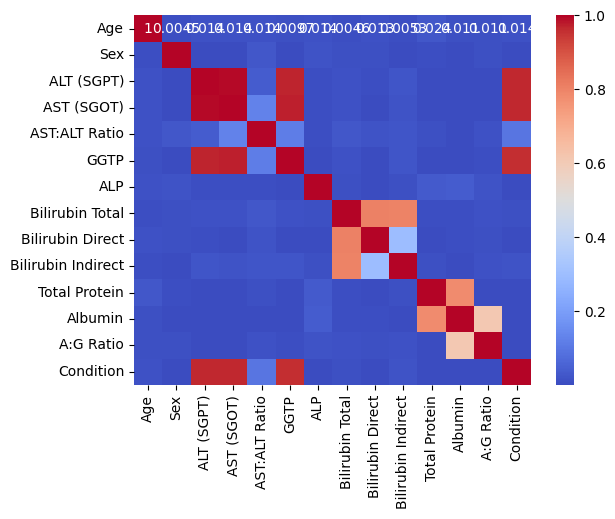

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = np.abs(df_liver.corr())
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [99]:
df=df_liver
df['Bilirubin_Ratio'] = df['Bilirubin Direct'] / (df['Bilirubin Total'] + 1e-5)

In [100]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=[0, 1, 2, 3])

In [101]:
#divide the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [102]:
#use the logistic regression model to predict the liver disease
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
#predict the target variable
y_pred = log_reg.predict(X_test)

In [104]:
#evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.935


In [105]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 79   9   0   0   0]
 [  9 224  11   0   0]
 [  0   4 200  12   0]
 [  0   0   7 191   7]
 [  0   0   0   6 241]]


<Axes: >

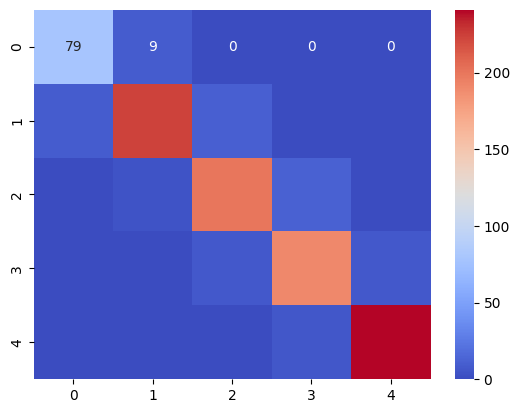

In [106]:
#visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm")

In [107]:
#classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        88
           1       0.95      0.92      0.93       244
           2       0.92      0.93      0.92       216
           3       0.91      0.93      0.92       205
           4       0.97      0.98      0.97       247

    accuracy                           0.94      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.94      0.94      0.94      1000



In [108]:
#use the random forest classifier to predict the liver disease
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
#predict the target variable
y_pred_rf = rf.predict(X_test)

In [110]:
#evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy_rf)

Accuracy: 0.992


In [111]:
#create a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

[[ 87   1   0   0   0]
 [  0 242   2   0   0]
 [  0   0 214   2   0]
 [  0   0   1 202   2]
 [  0   0   0   0 247]]


<Axes: >

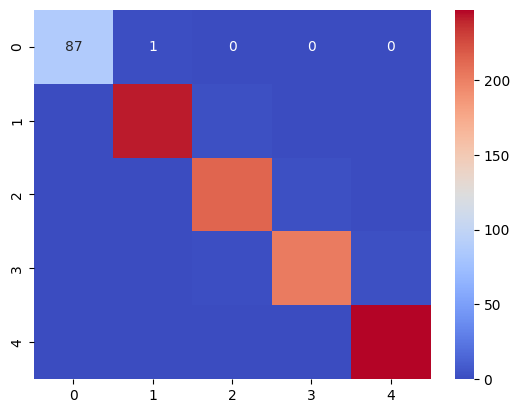

In [112]:
#visualize the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, cmap="coolwarm")

In [113]:
#classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       1.00      0.99      0.99       244
           2       0.99      0.99      0.99       216
           3       0.99      0.99      0.99       205
           4       0.99      1.00      1.00       247

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [114]:
#compare the accuracy of the logistic regression and random forest classifier
print('Accuracy Logistic Regression:', accuracy)
print('Accuracy Random Forest:', accuracy_rf)

Accuracy Logistic Regression: 0.935
Accuracy Random Forest: 0.992


In [115]:
#compare the classification report of the logistic regression and random forest classifier
print('Classification Report Logistic Regression:', class_report)
print('Classification Report Random Forest:', class_report_rf)

Classification Report Logistic Regression:               precision    recall  f1-score   support

           0       0.90      0.90      0.90        88
           1       0.95      0.92      0.93       244
           2       0.92      0.93      0.92       216
           3       0.91      0.93      0.92       205
           4       0.97      0.98      0.97       247

    accuracy                           0.94      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.94      0.94      0.94      1000

Classification Report Random Forest:               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       1.00      0.99      0.99       244
           2       0.99      0.99      0.99       216
           3       0.99      0.99      0.99       205
           4       0.99      1.00      1.00       247

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      10

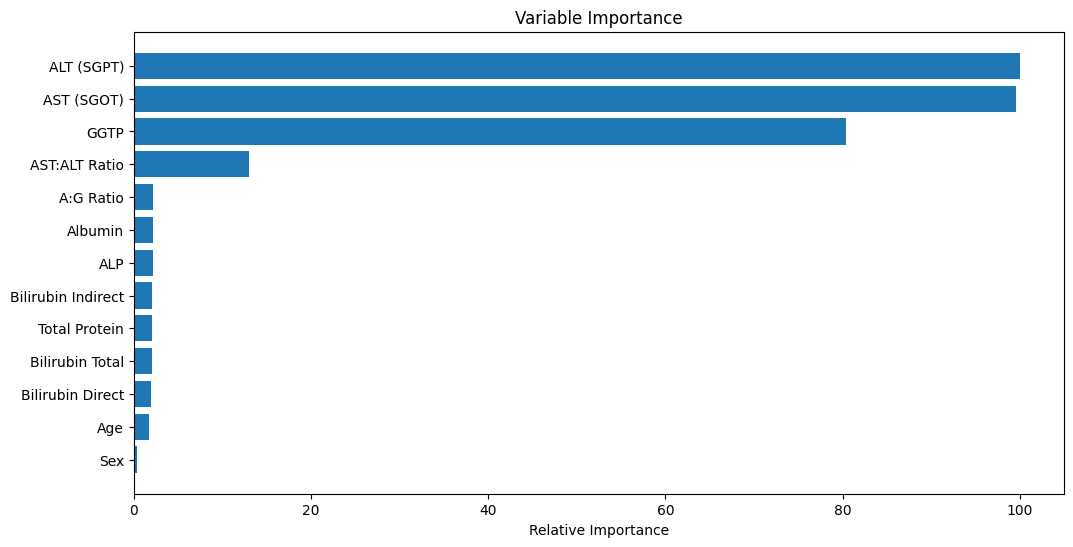

In [116]:
#plot the feature importance
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

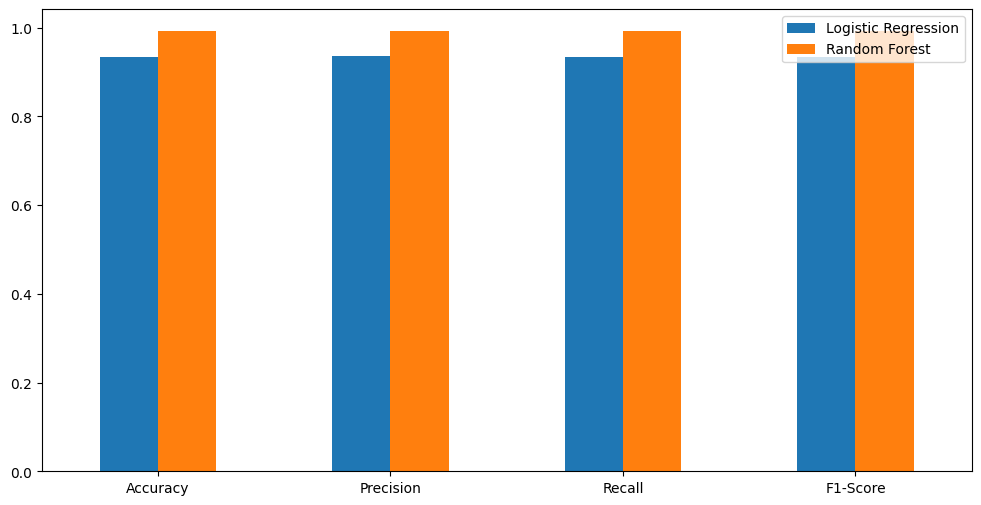

In [117]:
#comparison plot of the evaluation metrics of accuracy, precision, recall and f1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

evaluation_metrics = pd.DataFrame({'Logistic Regression': [accuracy, precision, recall, f1],
                                    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]},
                                   index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
evaluation_metrics.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=0)
plt.show()

In [118]:
#save the model
#import joblib
#joblib.dump(rf, 'liver_disease_model.pkl')